# Fetch data

We first import our code module, and fetch the data
The training data and testing data are dictionaries, split into x (data for the neural network) and y (answers to the dataset)

In [1]:
import models

trainData, testData, cols = models.loadData()
trainData, testData

({'x':         Home_Team  Away_Team  Season  Round  homeScore  awayScore  homePoint  \
  21922          53        464    1993      8          2          0        3.0   
  9734          149        462    2020     29          0          2        0.0   
  82799         406        271    1997     26          2          0        3.0   
  142359        318        219    2012     14          1          2        0.0   
  11568         283         48    1994     28          2          0        3.0   
  ...           ...        ...     ...    ...        ...        ...        ...   
  8443          255        229    2016     22          2          2        1.0   
  17008         539         48    2012     20          0          0        1.0   
  125625        356        430    1996      6          3          2        3.0   
  5539          168        226    2007      5          1          1        1.0   
  12102          55        256    1996     19          1          4        0.0   
  
        

# Simple model

We load in the simple model, or create one if none is found

In [2]:
sMod = models.loadModel("baseline.joblib")
sMod

LinearRegression()

We then train this model on the data and generate a baseline, then save the model

In [3]:
base = models.trainAndScore(sMod, trainData, testData)
models.saveModel(sMod, "baseline.joblib")

Training model: LinearRegression
Performance summary for LinearRegression
Mean squared error
- Training: 0.0502
- Testing : 0.0502
Score:
- Training:  0.9375
- Testing:   0.9381
- Difference:0.0006


# Feature selection

We determine the best features in the dataset, and generate a new restricted dataset and score from those

In [4]:
ntrainData, ntestData, ncols, nfeat = models.selectFeatures(trainData, testData, cols, 5)

base2 = models.trainAndScore(sMod, ntrainData, ntestData)

f"Selected columns: {', '.join(ncols)}"

Training model: LinearRegression
Performance summary for LinearRegression
Mean squared error
- Training: 0.5771
- Testing : 0.5771
Score:
- Training:  0.2817
- Testing:   0.2875
- Difference:0.0058


'Selected columns: Home_Team, Away_Team, Season, Round, homeScore'

# Model selection

We generate a set of new models to test against

In [5]:
mods = models.createNewModels()
f"New models: {', '.join([mod.__class__.__name__ for mod in mods])}"

'New models: LassoLarsIC, LinearDiscriminantAnalysis, SGDClassifier, GaussianNB, DecisionTreeClassifier, BaggingClassifier, MLPClassifier'

We then pit them against eachother, and our baseline model

Training model: LinearRegression
Performance summary for LinearRegression
Mean squared error
- Training: 0.5771
- Testing : 0.5771
Score:
- Training:  0.2817
- Testing:   0.2875
- Difference:0.0058
Training model: LassoLarsIC
Performance summary for LassoLarsIC
Mean squared error
- Training: 0.5771
- Testing : 0.5771
Score:
- Training:  0.2817
- Testing:   0.2875
- Difference:0.0058
Training model: LinearDiscriminantAnalysis
Performance summary for LinearDiscriminantAnalysis
Score:
- Training:  0.9071
- Testing:   0.9113
- Difference:0.0042
Training model: SGDClassifier


/home/skiy/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Performance summary for SGDClassifier
Score:
- Training:  0.8257
- Testing:   0.8231
- Difference:-0.0026
Training model: GaussianNB
Performance summary for GaussianNB
Score:
- Training:  0.9071
- Testing:   0.9113
- Difference:0.0042
Training model: DecisionTreeClassifier
Performance summary for DecisionTreeClassifier
Score:
- Training:  0.9933
- Testing:   0.8839
- Difference:-0.1094
Training model: BaggingClassifier
Performance summary for BaggingClassifier
Score:
- Training:  0.9878
- Testing:   0.8869
- Difference:-0.1009
Training model: MLPClassifier
Performance summary for MLPClassifier
Score:
- Training:  0.9091
- Testing:   0.9116
- Difference:0.0025


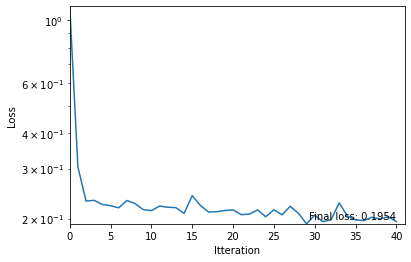

In [6]:
base3 = models.trainAndScore([sMod]+mods, ntrainData, ntestData)

And determine which model performed the best

In [7]:
bestModel = models.scoreModels(base3)

MLPClassifier performed the best on the testing set.


# Itterative training

We then chose to train the model on sub sets of the data that may better represent any newer values
(ie: those games played in more recent years)

Training model: MLPClassifier_best
Performance summary for MLPClassifier_best
Score:
- Training:  0.9138
- Testing:   0.9175
- Difference:0.0037


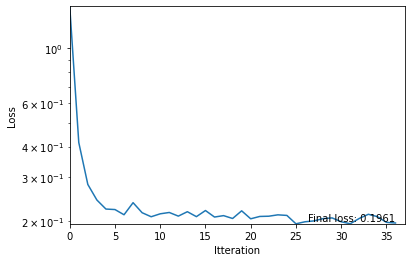

In [8]:
strainData = models.subSet(ntrainData, trainData["x"]["Season"] >= 2000)
stestData = models.subSet(ntestData, testData["x"]["Season"] >= 2000)

base4 = models.trainAndScore(bestModel, strainData, stestData)